In [20]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') 

In [3]:
train_data= pd.read_csv("loan_sanction_train.csv")

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA

In [7]:
train_data.shape

(614, 13)

In [9]:
train_data.describe() #describing only numerical columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


### Handling Missing values 

dropping the id column as it has unique ids which will not be useful for model building.

In [8]:
train_data.drop(['Loan_ID'],inplace=True,axis=1)

In [10]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
print("COUNT OF MISSING VALUES")
for col in train_data.columns:
        print(col, train_data[col].isnull().sum() )
    

COUNT OF MISSING VALUES
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0


In [13]:
print('Percentage of missing values')
for col in train_data.columns:
    print(col,':' ,train_data[col].isnull().mean()*100 )

Percentage of missing values
Loan_ID : 0.0
Gender : 2.1172638436482085
Married : 0.4885993485342019
Dependents : 2.44299674267101
Education : 0.0
Self_Employed : 5.211726384364821
ApplicantIncome : 0.0
CoapplicantIncome : 0.0
LoanAmount : 3.5830618892508146
Loan_Amount_Term : 2.2801302931596092
Credit_History : 8.143322475570033
Property_Area : 0.0
Loan_Status : 0.0


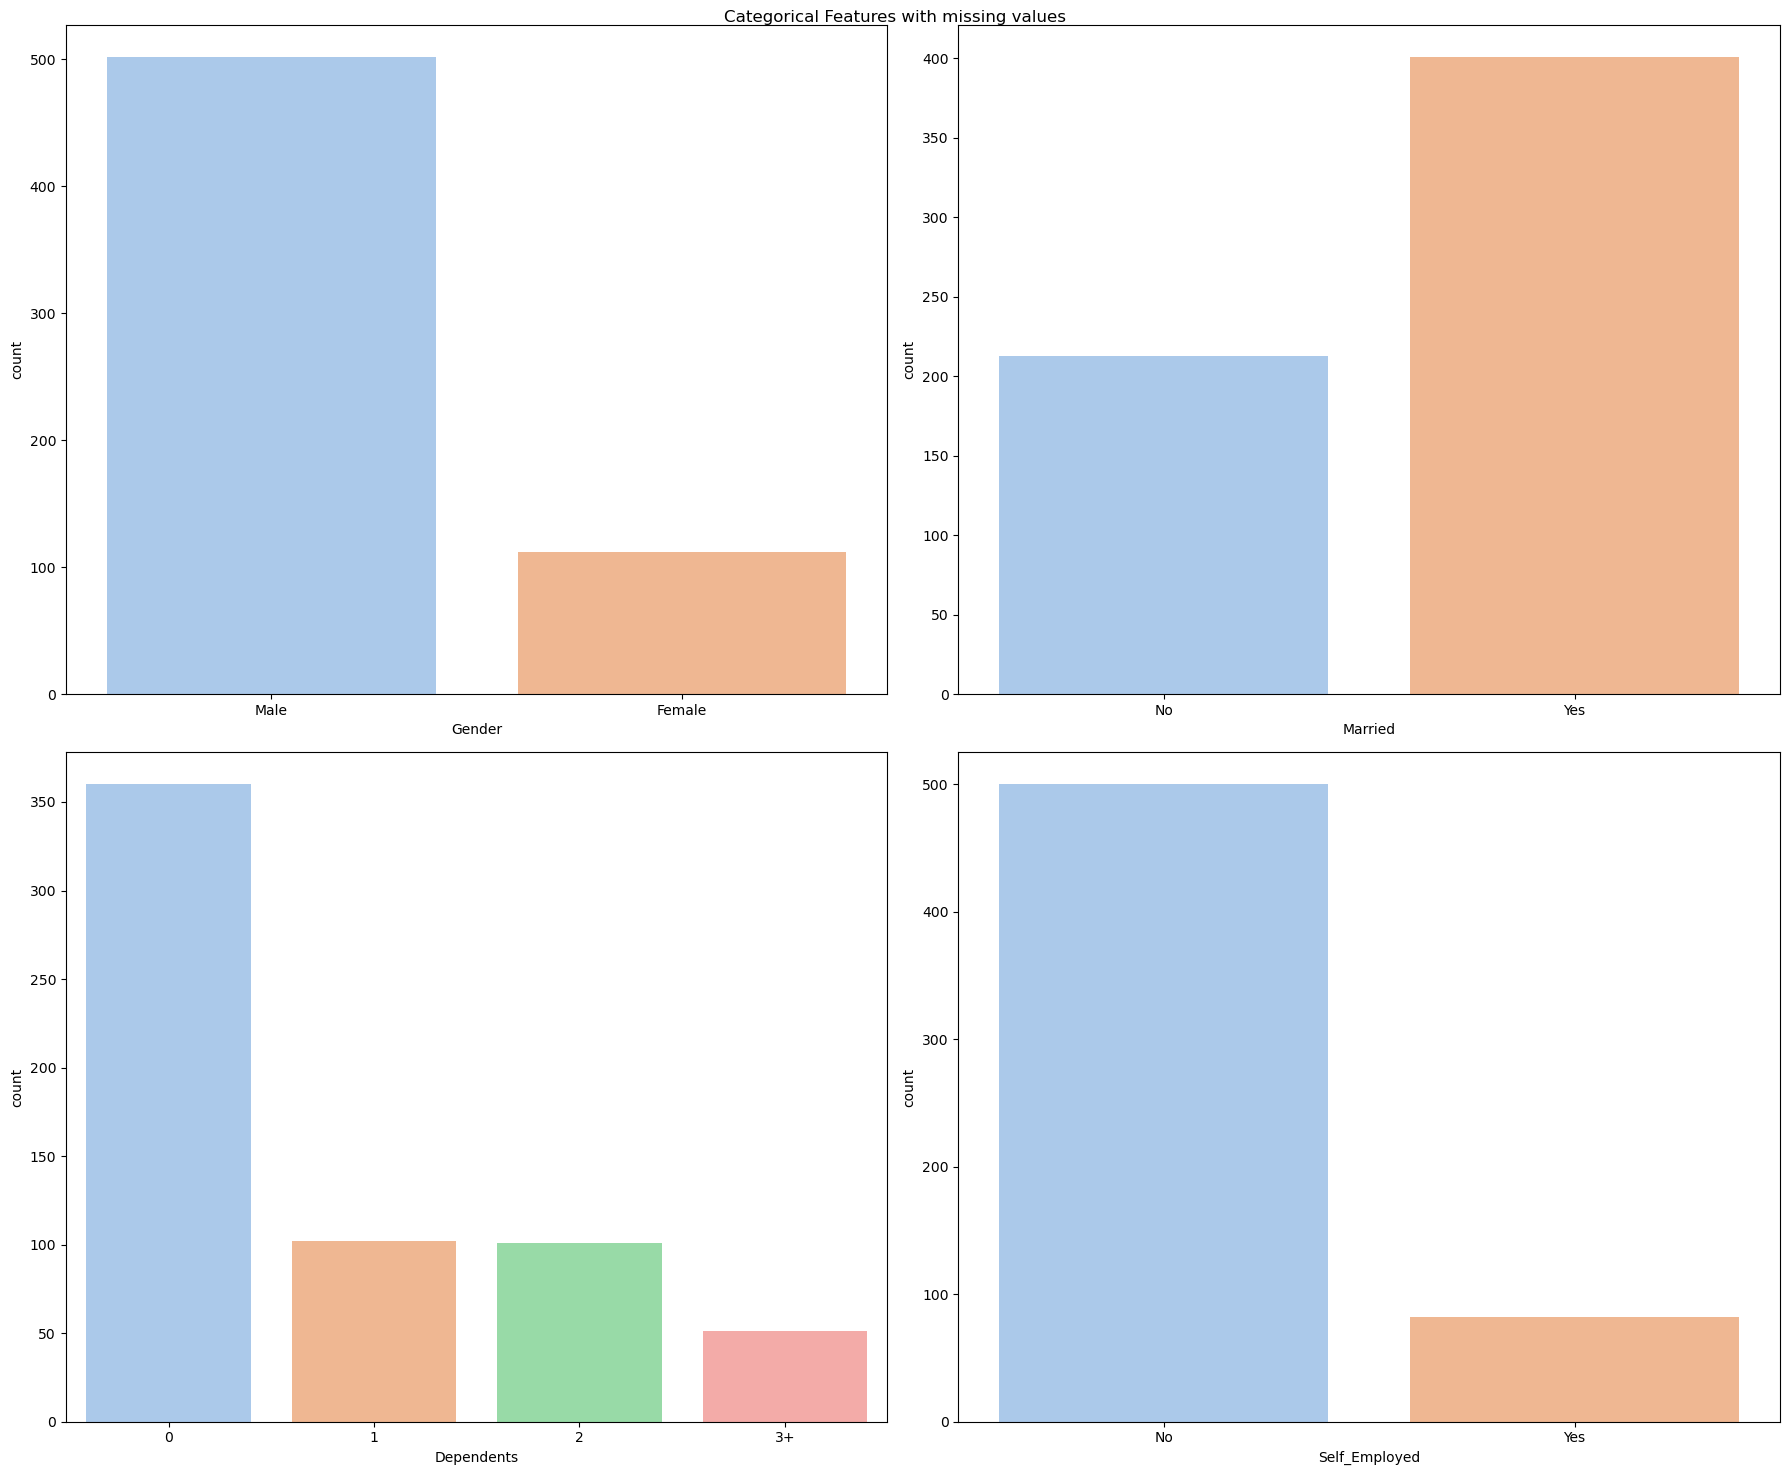

In [32]:
fig, axes = plt.subplots(2,2, figsize=(18, 15))
fig.suptitle('Categorical Features with missing values')
palette = "pastel"

sns.countplot(train_data, x="Gender",ax=axes[0,0],palette=palette)
sns.countplot(train_data, x="Married",ax=axes[0,1],palette=palette)
sns.countplot(train_data, x="Dependents",ax=axes[1,0],palette=palette)
sns.countplot(train_data, x="Self_Employed",ax=axes[1,1],palette=palette)

plt.tight_layout()
plt.show()

Filling the missing values in these **Categorical Columns**  with their most repeating values i.e. **Mode** and **Randomly Generated Values**

In [26]:
train_data['Gender']=train_data['Gender'].fillna("Male")
train_data['Dependents']=train_data['Dependents'].fillna("0")
train_data['Married']=train_data['Married'].fillna("Yes")

In [28]:
print('Missing Values in gender:',train_data['Gender'].isna().sum())
print('Missing Values in Dependents:',train_data['Dependents'].isna().sum())
print('Missing Values in Married:',train_data['Married'].isna().sum())

Missing Values in gender: 0
Missing Values in Dependents: 0
Missing Values in Married: 0


Filling the missing values in the Self Employed column with randomly generated values 

In [38]:
spl=train_data['Self_Employed'].dropna().sample(32).values

In [40]:
spl

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [42]:
train_data['Self_Employed'][train_data['Self_Employed'].isnull()] = spl

In [44]:
train_data['Self_Employed'].isnull().sum()

0

**Numerical Columns**
* Here we have in total 3 columns- Loan Amount , Loan Amount Term and Credit Score

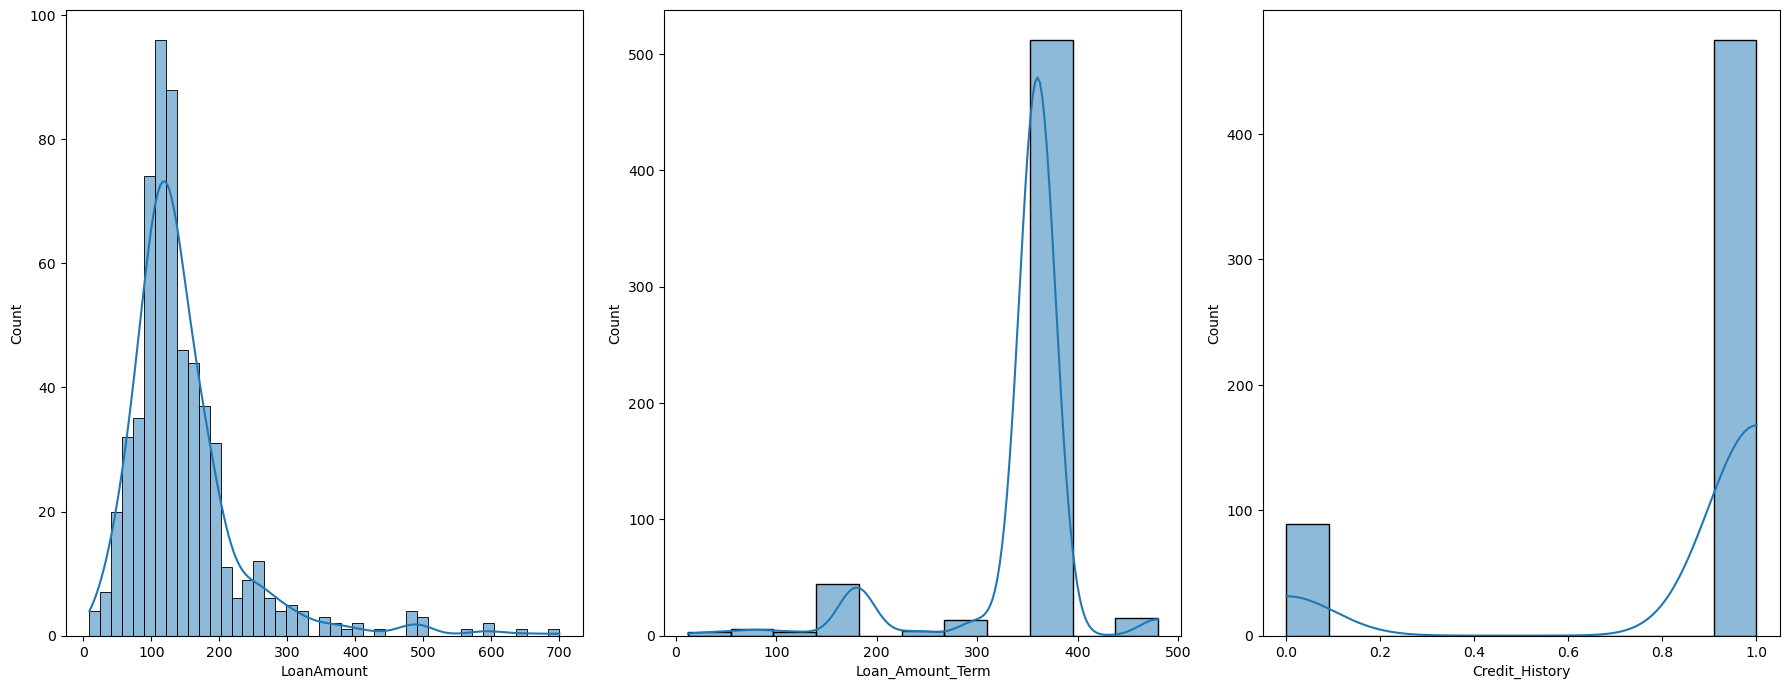

In [60]:
fig, axes = plt.subplots(1,3, figsize=(18, 7))
palette = "pastel"

sns.histplot(train_data["LoanAmount"],kde=True,ax=axes[0],palette=palette)
sns.histplot(train_data["Loan_Amount_Term"],kde=True,ax=axes[1],palette=palette)
sns.histplot(train_data["Credit_History"],kde=True,ax=axes[2],palette=palette)

plt.tight_layout()
plt.show()

Observations:
* the numerical columns - Loan Amount and Loan Amount terms are highly skewed.
* the credit History is not a numerical column rather a categorical column that has binary values=0(No Credit History) and 1 (Credit History)

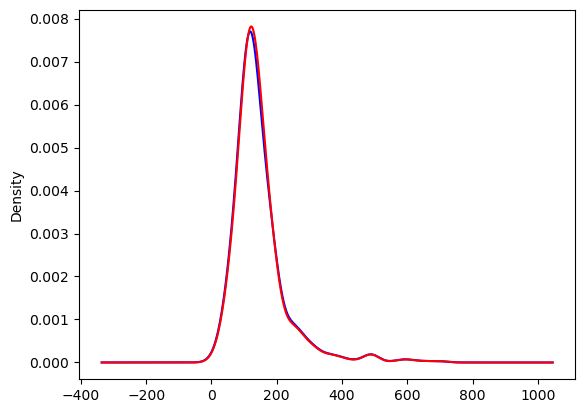

In [63]:
# taking mean as the value for filling the missing values and checking for the distribution before and after
m=train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())

train_data['LoanAmount'].plot(kind='kde',color='blue')
m.plot(kind='kde',color='red')
plt.show()

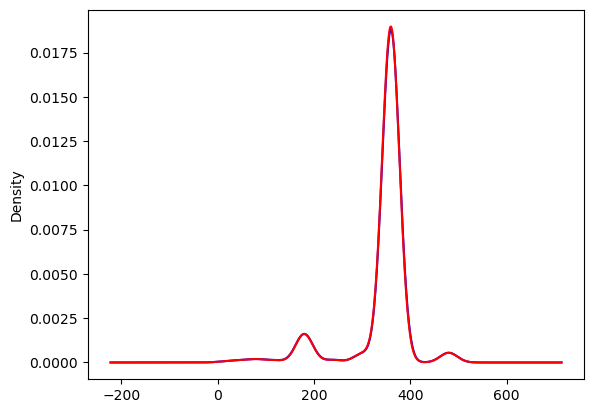

In [34]:
t=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Loan_Amount_Term'].plot(kind='kde',color='blue')
t.plot(kind='kde',color='red')
plt.show()


As the distribution of the data in the column is not much changed we can replace the missing values with mean

Changing the type of Credit History column to object 

In [65]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(), inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)

In [68]:
train_data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

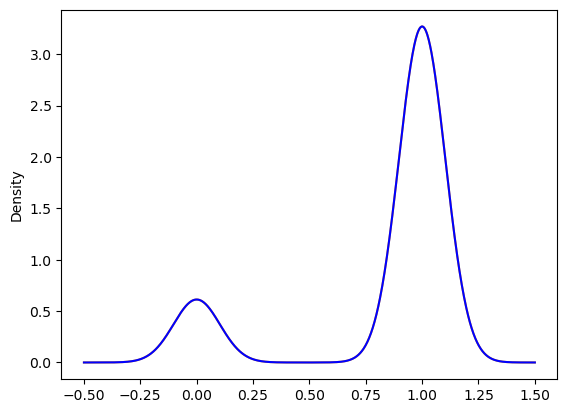

In [213]:
t=train_data['Credit_History'].fillna(train_data['Credit_History'].mode())
train_data['Credit_History'].plot(kind='kde',color='orange')
t.plot(kind='kde',color='blue')
plt.show()

In [71]:
train_data['Credit_History'].fillna(1.0, inplace=True)

In [73]:
train_data['Credit_History'].isnull().sum()

0

In [75]:
train_data['Credit_History']=train_data['Credit_History'].astype(str)

In [77]:
train_data['Credit_History'].dtype

dtype('O')

In [79]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have successfully filled all the missing data

#### EDA on numerical features

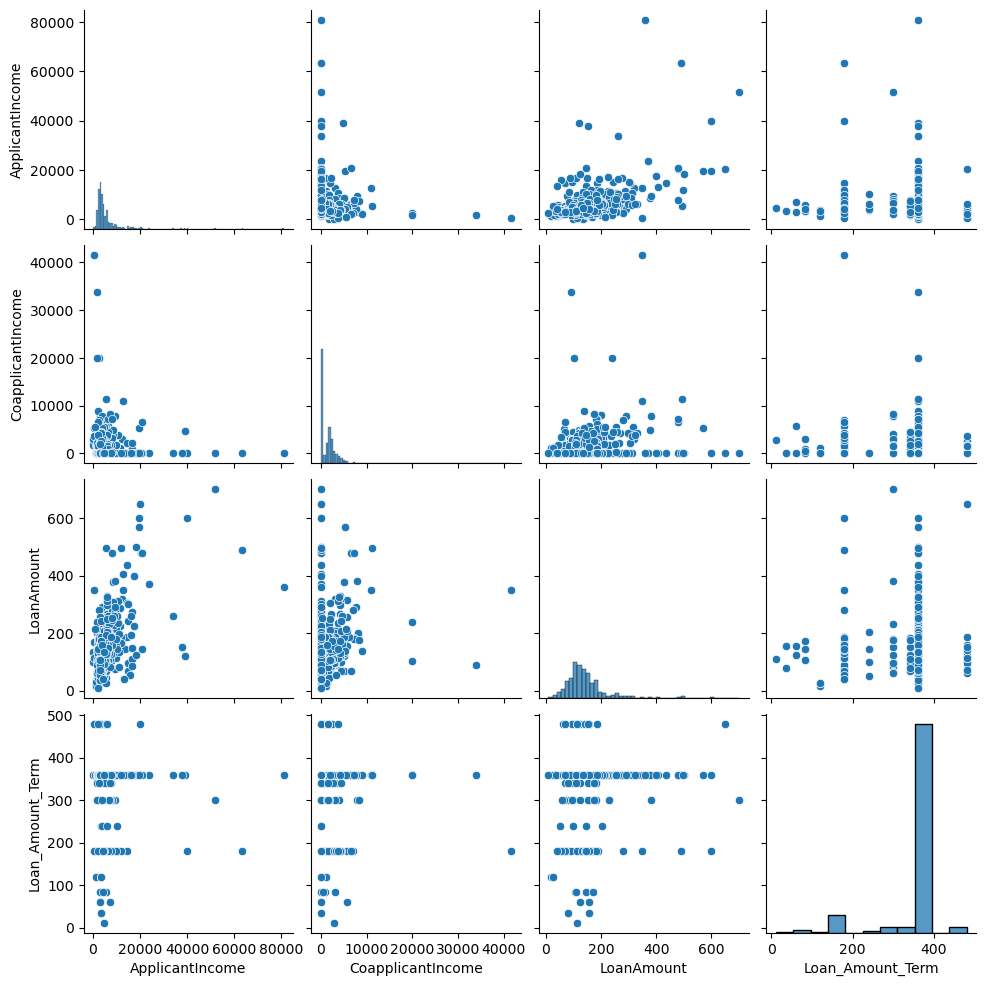

In [37]:
sns.pairplot(train_data)

As all the numerical data columns are skewed
* Removing outliers- capping them to iqr value

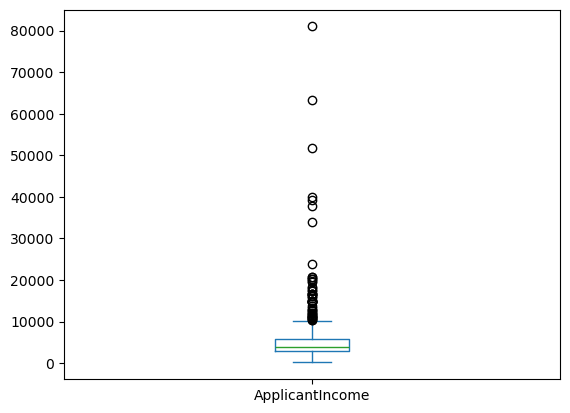

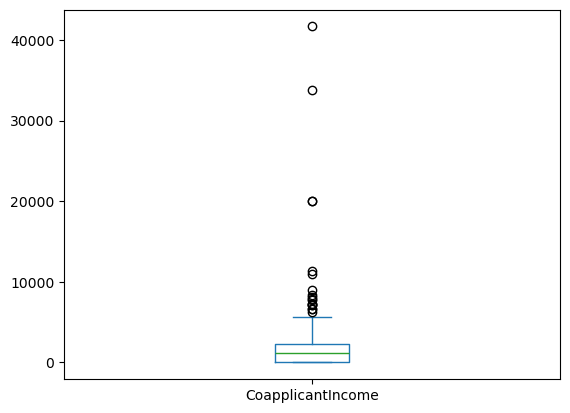

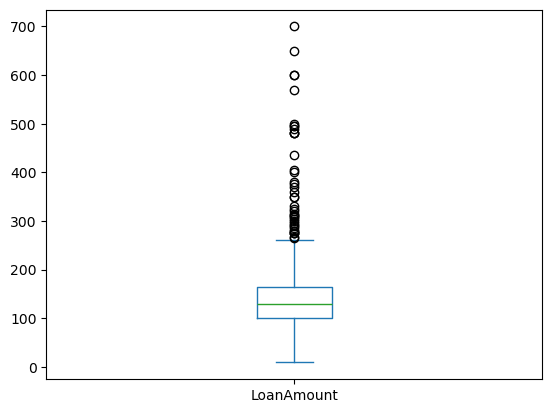

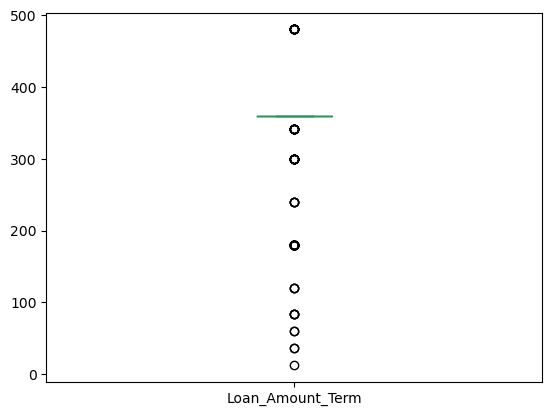

In [231]:
for col in train_data.columns:
    if train_data.dtypes[col]!='O':
        train_data[col].plot(kind='box')
        plt.show()

#### Removing Outliers

In [60]:
#applicant income column
Q1=train_data['ApplicantIncome'].quantile(0.25)
Q3=train_data['ApplicantIncome'].quantile(0.75)
iqr=Q3-Q1

upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr

print('IQR:' ,iqr)
print('Lower limit:' ,lower_limit)
print('Upper Limit:' ,upper_limit)

train_data['ApplicantIncome']= np.where(train_data['ApplicantIncome'] > upper_limit , upper_limit , train_data['ApplicantIncome'])

IQR: 2917.5
Lower limit: -1498.75
Upper Limit: 10171.25


In [62]:
#coapplicant income  column

Q1=train_data['CoapplicantIncome'].quantile(0.25)
Q3=train_data['CoapplicantIncome'].quantile(0.75)
iqr=Q3-Q1

upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr

#outliers
print("outliers before:",train_data.loc[train_data['CoapplicantIncome']>upper_limit,['CoapplicantIncome']].count())

#Capping the oulier values
train_data['CoapplicantIncome']= np.where(train_data['CoapplicantIncome'] > upper_limit , upper_limit , train_data['CoapplicantIncome'])
print("outliers after:", train_data.loc[train_data['CoapplicantIncome']>upper_limit ,['CoapplicantIncome']].count())


outliers before: CoapplicantIncome    18
dtype: int64
outliers after: CoapplicantIncome    0
dtype: int64


In [64]:
#Loan Amount column

Q1=train_data['LoanAmount'].quantile(0.25)
Q3=train_data['LoanAmount'].quantile(0.75)
iqr=Q3-Q1

upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr

#outliers
o=train_data.loc[train_data['LoanAmount']>upper_limit,['LoanAmount']].count()
print("outliers before:",o)

#Capping the oulier values
train_data['LoanAmount']= np.where(train_data['LoanAmount'] > upper_limit , upper_limit , train_data['LoanAmount'])
print("outliers after:", train_data.loc[train_data['LoanAmount']>upper_limit ,['LoanAmount']].count())


outliers before: LoanAmount    41
dtype: int64
outliers after: LoanAmount    0
dtype: int64


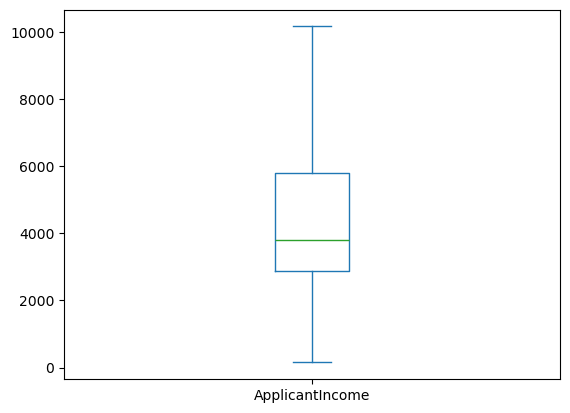

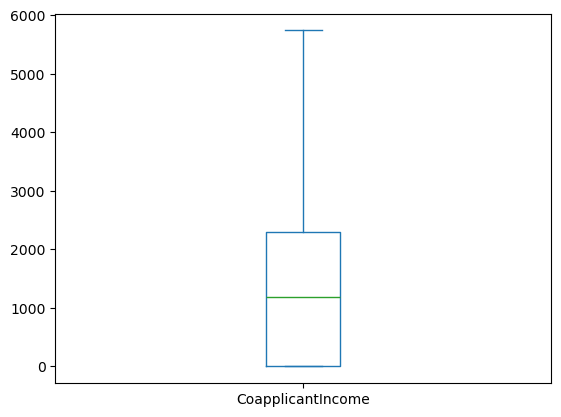

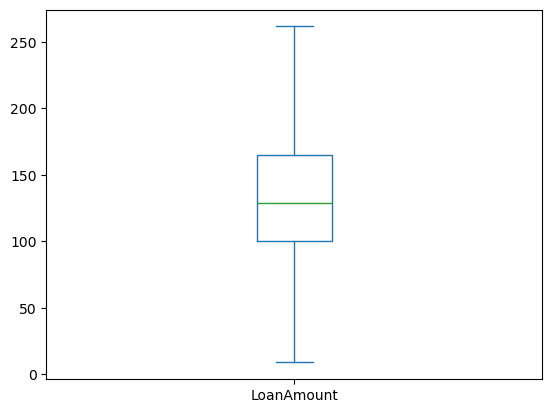

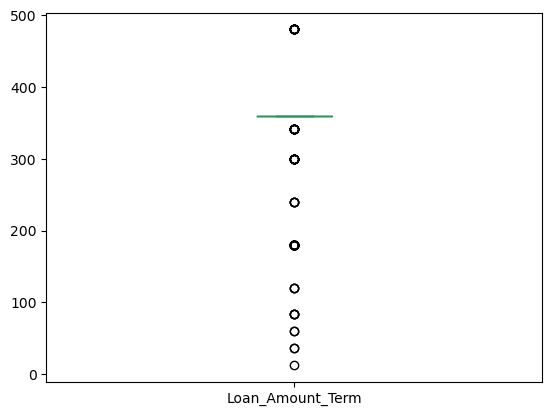

In [31]:
for col in train_data.columns:
    if train_data.dtypes[col]!='O':
        train_data[col].plot(kind='box')
        plt.show()

Converting the Numerical Column into categorical 

In [84]:
period=train_data['Loan_Amount_Term'].unique()
np.sort(period)

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 342., 360., 480.])

In [86]:
train_data['Loan_Amount_Term']= np.where(
    train_data['Loan_Amount_Term']<180, 'Less than 6 Months',
    np.where(
        train_data['Loan_Amount_Term']<360 ,'6 Months',
        np.where(
            train_data['Loan_Amount_Term']==360 ,'1 Year',
            'More than 1 Year'
        )
        
    )
)

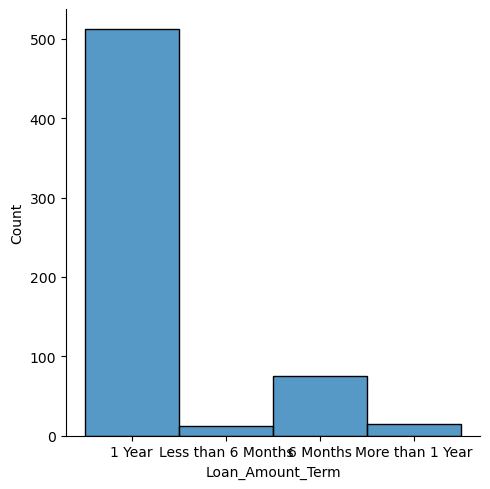

In [94]:
sns.displot(train_data['Loan_Amount_Term'])

Loan Amount Term is also a nominal Categorical feature now

####  Categorical Features

In [88]:
print("Count of labels in each cateforical column")
for col in train_data.columns:
    if train_data.dtypes[col]=='O':
        print(col,":" ,len(train_data[col].unique()),'labels-',train_data[col].unique()  )
    

Count of labels in each cateforical column
Gender : 2 labels- ['Male' 'Female']
Married : 2 labels- ['No' 'Yes']
Dependents : 4 labels- ['0' '1' '2' '3+']
Education : 2 labels- ['Graduate' 'Not Graduate']
Self_Employed : 2 labels- ['No' 'Yes']
Loan_Amount_Term : 4 labels- ['1 Year' 'Less than 6 Months' '6 Months' 'More than 1 Year']
Credit_History : 2 labels- ['1.0' '0.0']
Property_Area : 3 labels- ['Urban' 'Rural' 'Semiurban']
Loan_Status : 2 labels- ['Y' 'N']


#### Observation:
* The data has total of 8 Categorical features
* 1 Ordinal Feature - (Education) and 7 Nominal Features
* From the Nominal Features - 2 Columns are multivariate {  Property Area , Dependents}


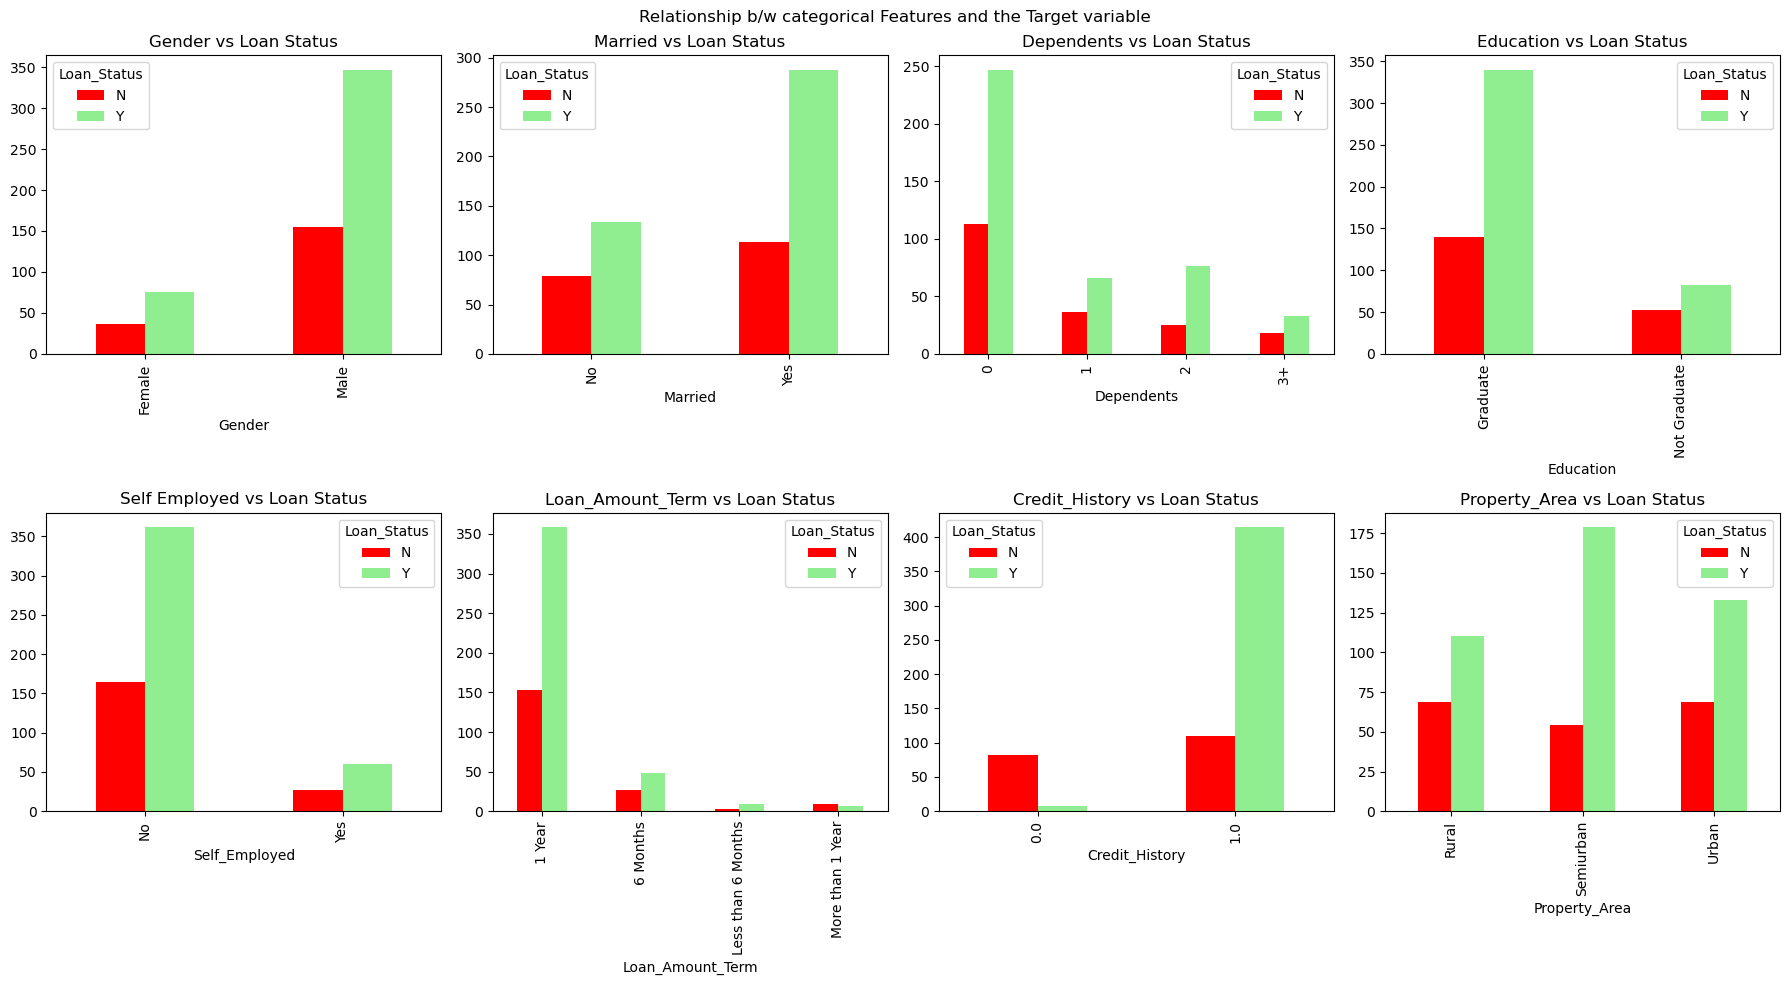

In [106]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Relationship b/w categorical Features and the Target variable')

# Define the colors for "No" and "Yes"
colors = ['red', 'lightgreen']

# Plot for gender and loan status
train_data.groupby(['Gender', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[0, 0], color=colors
)
axes[0, 0].set_title('Gender vs Loan Status')

train_data.groupby(['Married', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[0, 1], color=colors
)
axes[0, 1].set_title('Married vs Loan Status')

train_data.groupby(['Dependents', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[0, 2], color=colors
)
axes[0, 2].set_title('Dependents vs Loan Status')

train_data.groupby(['Education', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[0, 3], color=colors
)
axes[0, 3].set_title('Education vs Loan Status')

train_data.groupby(['Self_Employed', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[1, 0], color=colors
)
axes[1, 0].set_title('Self Employed vs Loan Status')

train_data.groupby(['Loan_Amount_Term', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[1, 1], color=colors
)
axes[1, 1].set_title('Loan_Amount_Term vs Loan Status')

train_data.groupby(['Credit_History', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[1, 2], color=colors
)
axes[1, 2].set_title('Credit_History vs Loan Status')

train_data.groupby(['Property_Area', 'Loan_Status'])['Loan_Status'].count().unstack().plot.bar(
    ax=axes[1, 3], color=colors
)
axes[1, 3].set_title('Property_Area vs Loan Status')

# Adjust layout
plt.tight_layout()
plt.show()


([<matplotlib.patches.Wedge at 0x1d4a48facc0>,
 [Text(-0.6105420895241798, 0.9150072988339757, 'Y'),
  Text(0.6105420038550106, -0.9150073559970479, 'N')],
 [Text(-0.33302295792227987, 0.4990948902730776, '68.7%'),
  Text(0.3330229111936421, -0.49909492145293516, '31.3%')])

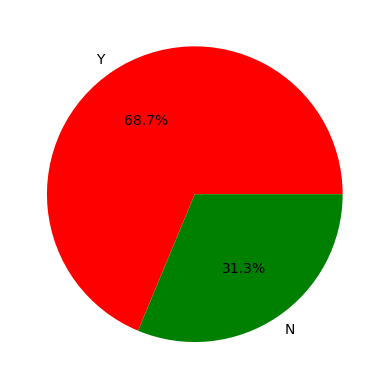

In [108]:
x=train_data['Loan_Status'].value_counts()
plt.pie(x,labels=x.index,colors = ['red', 'green'], autopct='%1.1f%%')

#### Observations
* The data is Imbalanced as 68.7% of the target variables are of YES category
* All categories have one dominating label
* Not having credit history implies more chance of the loan been rejected.

#### Encoding

In [117]:
train_data['Education']=np.where(
    train_data['Education']=='Graduate' , 1,0
)

In [119]:
train_data_enc=pd.get_dummies(train_data,columns=[
    'Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'
],drop_first=True).astype(int)
train_data_enc.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Loan_Amount_Term_6 Months,Loan_Amount_Term_Less than 6 Months,Loan_Amount_Term_More than 1 Year,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,5849,0,146,1,0,0,0,0,0,0,0,0,1,0,1,1
1,1,4583,1508,128,1,1,1,0,0,0,0,0,0,1,0,0,0
2,1,3000,0,66,1,1,0,0,0,1,0,0,0,1,0,1,1
3,0,2583,2358,120,1,1,0,0,0,0,0,0,0,1,0,1,1
4,1,6000,0,141,1,0,0,0,0,0,0,0,0,1,0,1,1


In [121]:
x=train_data_enc.iloc[:,:-1]
y=train_data_enc.iloc[:,-1]


In [123]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: int32

### Feature Selection

In [125]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,random_state=42,test_size=0.2)

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [129]:
best=SelectKBest(score_func=chi2,k=15)
fit= best.fit(x,y)

score=pd.DataFrame(fit.scores_)
col= pd.DataFrame(x.columns)


In [131]:
f=pd.concat([col,score],axis=1)
f.columns=['feature','score']

In [133]:
f

,feature,score
0,Education,0.988390
1,ApplicantIncome,93.904964
2,CoapplicantIncome,11342.184564
3,LoanAmount,39.062615
4,Gender_Male,0.036234
5,Married_Yes,1.782425
6,Dependents_1,0.768400
7,Dependents_2,1.996446
8,Dependents_3+,0.384200
9,Self_Employed_Yes,0.002252


In [52]:
top=f.sort_values('score',ascending=False).nlargest(13,'score')['feature']

In [54]:
xtrain,xtest,ytrain,ytest  = train_test_split(x[top],y,random_state=42,test_size=0.2)

In [56]:
xtrain.head(1)

,CoapplicantIncome,LoanAmount,Credit_History_1.0,Property_Area_Semiurban,Loan_Amount_Term_More than 1 Year,Dependents_2,Married_Yes,Education,Property_Area_Urban,Loan_Amount_Term_6 Months,Dependents_1,Dependents_3+,Loan_Amount_Term_Less than 6 Months
83,2250,261,1,1,0,0,1,1,0,0,0,0,0


## Model Building

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


## Logistic Regression

In [140]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [142]:
predict_lr=lr.predict(xtest)

In [144]:
acc_lr=accuracy_score(predict_lr,ytest)
print(acc_lr)

0.7886178861788617


In [146]:
print(classification_report(ytest,predict_lr))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## Decision Tree

In [148]:
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
predict_dtree=dtree.predict(xtest)
acc_dtree=accuracy_score(predict_dtree,ytest)
print(acc_dtree)

0.6504065040650406


[Text(0.45244006849315066, 0.96875, 'x[13] <= 0.5\ngini = 0.423\nsamples = 491\nvalue = [149, 342]'),
 Text(0.0821917808219178, 0.90625, 'x[2] <= 8115.0\ngini = 0.157\nsamples = 70\nvalue = [64, 6]'),
 Text(0.26731592465753423, 0.9375, 'True  '),
 Text(0.0547945205479452, 0.84375, 'x[1] <= 4316.5\ngini = 0.136\nsamples = 68\nvalue = [63, 5]'),
 Text(0.03287671232876712, 0.78125, 'x[3] <= 94.0\ngini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(0.021917808219178082, 0.71875, 'x[3] <= 89.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.010958904109589041, 0.65625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.03287671232876712, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.043835616438356165, 0.71875, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.07671232876712329, 0.78125, 'x[1] <= 5351.0\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.06575342465753424, 0.71875, 'x[3] <= 128.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.054794520547

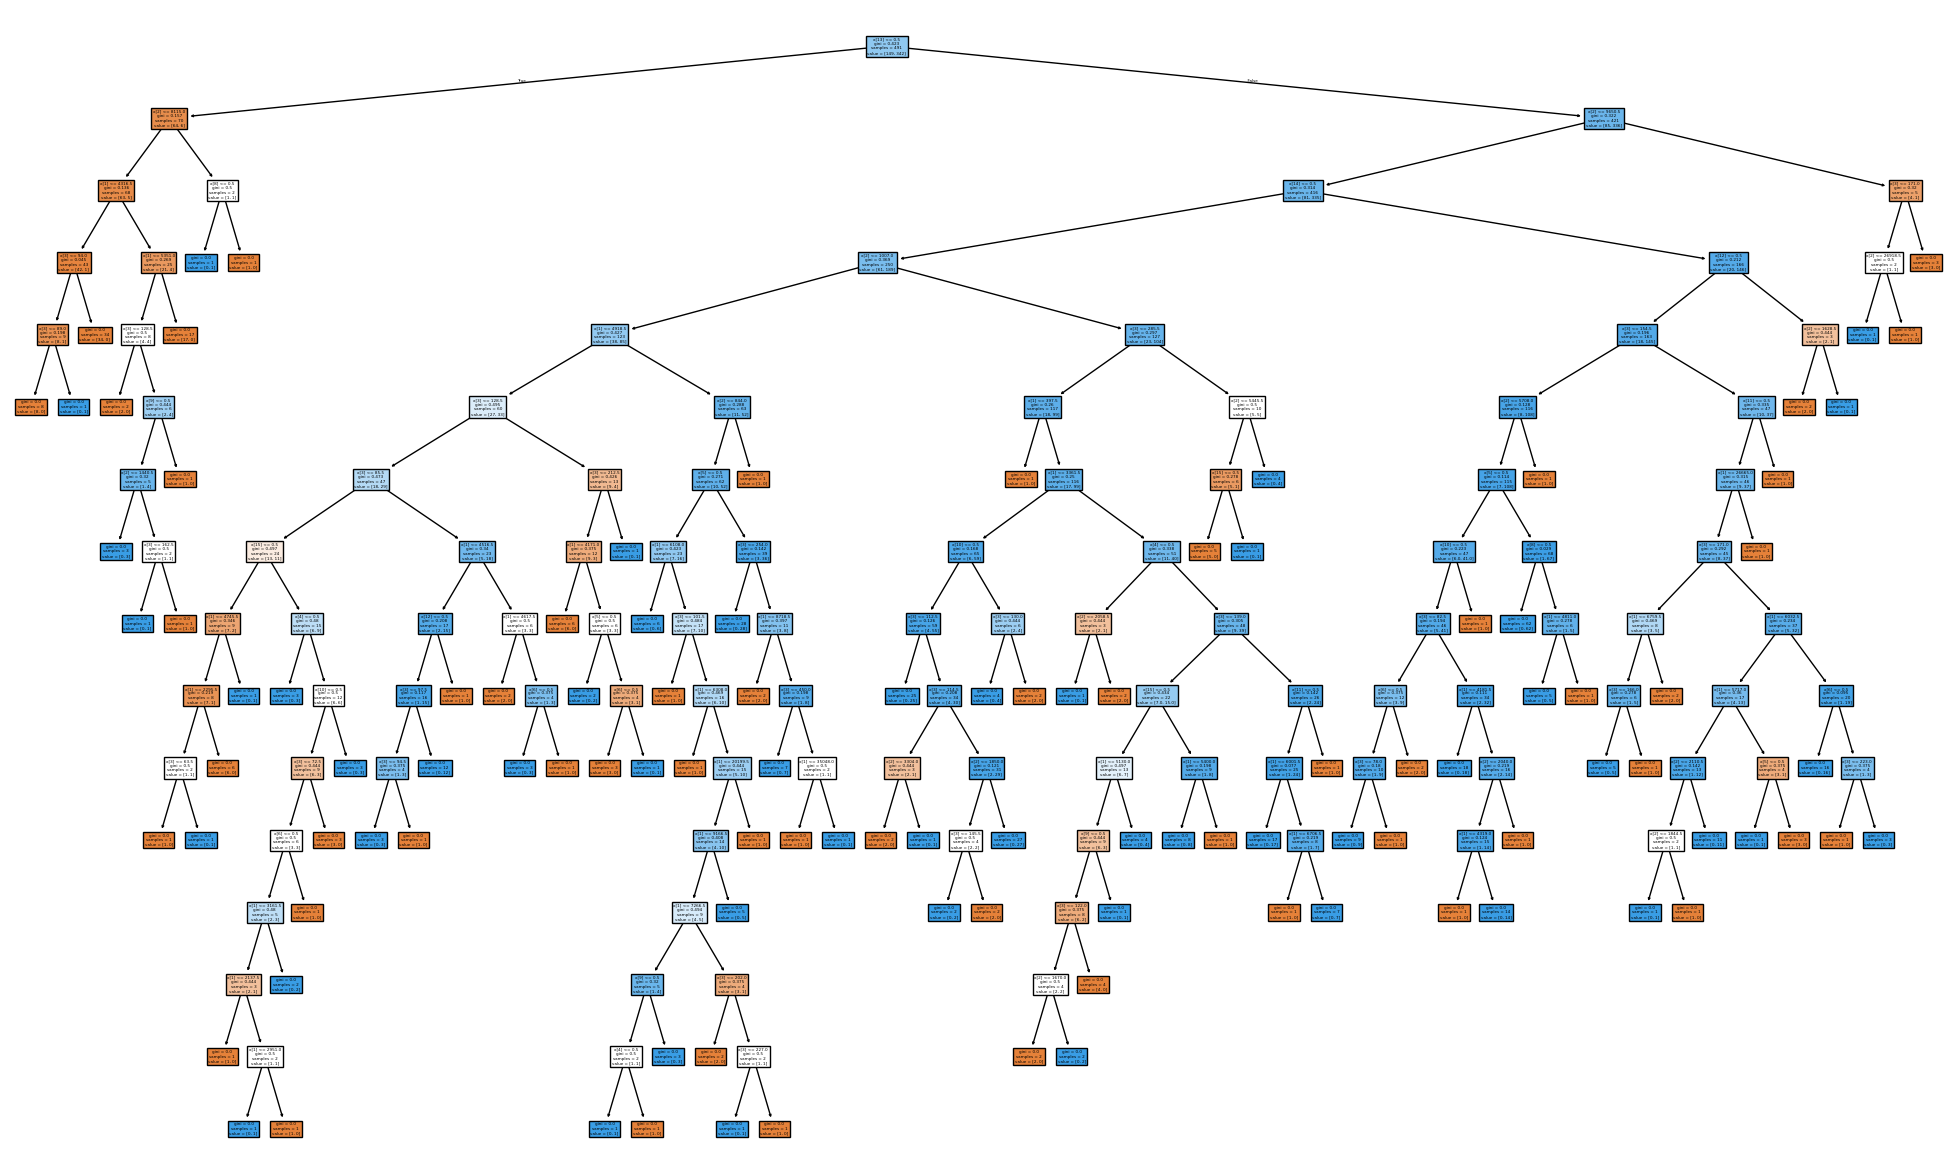

In [141]:
plt.figure(figsize=(25,15))
tree.plot_tree(dtree,filled=True)

In [150]:
parameter={'criterion':['gini', 'entropy', 'log_loss'] , 
           'splitter' :['best', 'random'],
           'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12]}
cv=GridSearchCV(dtree,parameter,cv=10, scoring='accuracy')
cv.fit(xtrain,ytrain)
predict_dtree2=cv.predict(xtest)
acc_tree=accuracy_score(predict_dtree2,ytest)
acc_tree

0.7886178861788617

In [169]:
print(classification_report(ytest,predict_dtree2))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## Naive Bayes

In [154]:
naiveb= GaussianNB()
naiveb.fit(xtrain,ytrain)
predict_nb=naiveb.predict(xtest)
acc_nb=accuracy_score(predict_nb,ytest)

In [156]:
acc_nb

0.7560975609756098

In [79]:
print(classification_report(ytest,predict_nb))

              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



### Gradient Boosting algo

In [158]:
gb=GradientBoostingClassifier()

In [160]:
gb.fit(xtrain,ytrain)
predict_gb=gb.predict(xtest)
print(accuracy_score(predict_gb,ytest))

0.7642276422764228


### Random Forest

In [171]:
rf=RandomForestClassifier(max_samples=0.75)


In [173]:
rf.fit(xtrain,ytrain)
predict_rf=rf.predict(xtest)
print(accuracy_score(predict_rf,ytest))

0.7723577235772358


In [175]:
print(classification_report(ytest,predict_rf))

              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



**Model Selection**
* As **Logistic Regression** & **Decision Tree** not only have higher accuracy but have high precision , recall and F1 score .
* Both these are best fitted and any one of these can be selected

## Creating Pipelines

In [123]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

In [194]:
# Filled missing values , removed outliers from the data 
train_data.head(1).values

array([['Male', 'No', '0', 'Graduate', 'No', 5849.0, 0.0,
        146.41216216216216, '1 Year', '1.0', 'Urban', 'Y']], dtype=object)

In [155]:
xtrain,xtest,ytrain,ytest= train_test_split(train_data.iloc[:,0:-1],train_data.iloc[:,-1],test_size=0.15,random_state=42)

In [157]:
trf1= ColumnTransformer([
    ('ohe',OneHotEncoder(handle_unknown='ignore',drop='first'),[0,1,2,3,4,8,9,10])
],remainder='passthrough')

In [177]:
trf2= SelectKBest(score_func=chi2,k=13)
trf3=LogisticRegression()

In [179]:
#make pipeline
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [181]:
from sklearn import set_config
set_config(display='diagram')

In [183]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 1, 2, 3, 4, 8, 9, 10])])),
                ('trf2',
                 SelectKBest(k=13,
                             score_func=<function chi2 at 0x000001D45059E8E0>)),
                ('trf3', RandomForestClassifier(max_samples=0.75))])

In [185]:
feature_names = pipe.named_steps['trf1'].get_feature_names_out()
feature_names

array(['ohe__Gender_Male', 'ohe__Married_Yes', 'ohe__Dependents_1',
       'ohe__Dependents_2', 'ohe__Dependents_3+',
       'ohe__Education_Not Graduate', 'ohe__Self_Employed_Yes',
       'ohe__Loan_Amount_Term_6 Months',
       'ohe__Loan_Amount_Term_Less than 6 Months',
       'ohe__Loan_Amount_Term_More than 1 Year',
       'ohe__Credit_History_1.0', 'ohe__Property_Area_Semiurban',
       'ohe__Property_Area_Urban', 'remainder__ApplicantIncome',
       'remainder__CoapplicantIncome', 'remainder__LoanAmount'],
      dtype=object)

In [187]:
selected_indices = pipe.named_steps['trf2'].get_support(indices=True)
print("Selected indices:", selected_indices)
print('selected feature:',feature_names[selected_indices])

Selected indices: [ 1  2  3  4  5  7  9 10 11 12 13 14 15]
selected feature: ['ohe__Married_Yes' 'ohe__Dependents_1' 'ohe__Dependents_2'
 'ohe__Dependents_3+' 'ohe__Education_Not Graduate'
 'ohe__Loan_Amount_Term_6 Months' 'ohe__Loan_Amount_Term_More than 1 Year'
 'ohe__Credit_History_1.0' 'ohe__Property_Area_Semiurban'
 'ohe__Property_Area_Urban' 'remainder__ApplicantIncome'
 'remainder__CoapplicantIncome' 'remainder__LoanAmount']


In [189]:
# predictions
predict= pipe.predict(xtest)
print(accuracy_score(predict,ytest))

0.7526881720430108


In [192]:
#exporting pipeline
import pickle
pickle.dump(pipe,open('pipe1.pkl','wb'))